In [1]:
import pandas as pd # type: ignore

import openpyxl 

# Reading Data

* `pd.read_csv` – read data from csv file: [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
* `pd.read_excel` – read data from excel file: [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

## Exercise 1
Read the data from `data/iris.csv` and assign it to the `iris` variable; preview the variable in notebook 

In [2]:
iris = pd.read_csv('data/iris.csv')

iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Exercise 2
Read data from `data/iris_modified.csv`.

In [3]:
irs_modified = pd.read_csv('data/iris_modified.csv')

irs_modified

,"sepal.length;""sepal.width"";""petal.length"";""petal.width"";""variety"""
0,"5.1;3.5;1.4;.2;""Setosa"""
1,"4.9;3;1.4;.2;""Setosa"""
2,"4.7;3.2;1.3;.2;""Setosa"""
3,"4.6;3.1;1.5;.2;""Setosa"""
4,"5;3.6;1.4;.2;""Setosa"""
...,...
145,"6.7;3;5.2;2.3;""Virginica"""
146,"6.3;2.5;5;1.9;""Virginica"""
147,"6.5;3;5.2;2;""Virginica"""
148,"6.2;3.4;5.4;2.3;""Virginica"""


## Exercise 3
Save the `iris` DataFrame to the `iris.xlsx` file (sheet name `iris`). See [to_excel](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html). (May need to install `openpyxl` package)

In [4]:
iris.to_excel('iris.xlsx')

## Exercise 4*
Read data from the `miakob` sheet in `data/tablica_a._tablica_trwania_zycia_2019.xlsx`. 

(May need to install `openpyxl` package and specify it as `engine` in order to work)

In [11]:
file_path = "data/tablica_a._tablica_trwania_zycia_2019.xlsx"

sheet_name = 'miakob'
miakob_data = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl', skiprows=(4))

miakob_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,w wieku x at age x,skumulowana cumulated,Unnamed: 6
0,x,lx,qx,dx,Lx,Tx,ex
1,NaN,Kobiety w miastach Females in urban areas,NaN,NaN,NaN,NaN,NaN
2,0,100000,0.00353,353,99823.5,8165260,81.65
3,1,99647,0.00023,23,99635.5,8065437,80.94
4,2,99624,0.00015,15,99616.5,7965801,79.96
...,...,...,...,...,...,...,...
98,96,8551,0.2418,2068,7517,25444.5,2.98
99,97,6483,0.26232,1701,5632.5,17927.5,2.77
100,98,4782,0.28378,1357,4103.5,12295,2.57
101,99,3425,0.30614,1048,2901,8191.5,2.39


# DataFrame and Series

The basic types from `pandas` library are [`DataFrame`](https://pandas.pydata.org/docs/reference/frame.html), for representing tabular data, and [`Series`](https://pandas.pydata.org/docs/reference/series.html) for 1-dimensional data (e.g. columns in `DataFrame`)

## Data types
`pandas` uses the same types as `numpy`. 
The following parameters are available:

* `dtypes` for `DataFrame`.
* `dtype` for `Series`.
* Both provide an `astype` method.

In [ ]:
iris.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [ ]:
iris["sepal.length"].dtype

dtype('float64')

## Exercise 5
Create a copy of the `iris` data frame and change the type of `petal.length` to `float32` 

In [12]:
# Create a copy of the iris dataframe
iris_copy = iris.copy()

# change the type of `petal.length` to `float32`
iris_copy = iris_copy.astype({"petal.length": "float32"})

iris_copy.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float32
petal.width     float64
variety          object
dtype: object

# Filtering
You can access column data in `pandas` using two different notations: `df.column_name` or `df["column_name"]`.

To get multiple columns use the following syntax: `df[list_of_column_names]`.

## Exercise 6
Create a data frame with the `Virginica` variety only and calculate its `mean` value and plot a histogram for each numerical column.

In [13]:
import matplotlib.pyplot as plt


In [14]:
# Filter the DataFrame for the Virginica variety
virginica_df = iris_copy[iris_copy['variety'] == 'Virginica']


In [15]:
# Calculate the mean values for each numerical column
virginica_mean = virginica_df.mean(numeric_only=True)
print(virginica_mean)

sepal.length    6.588
sepal.width     2.974
petal.length    5.552
petal.width     2.026
dtype: float64


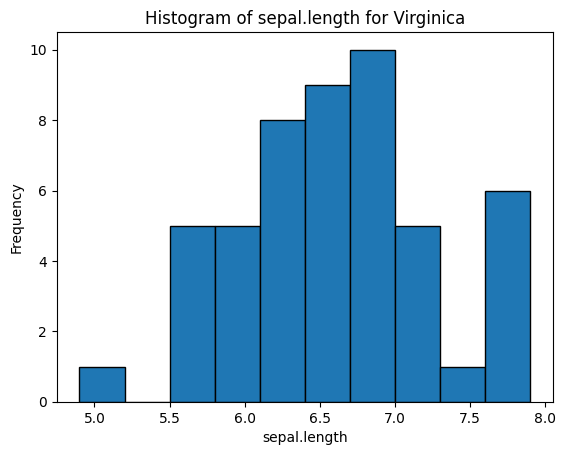

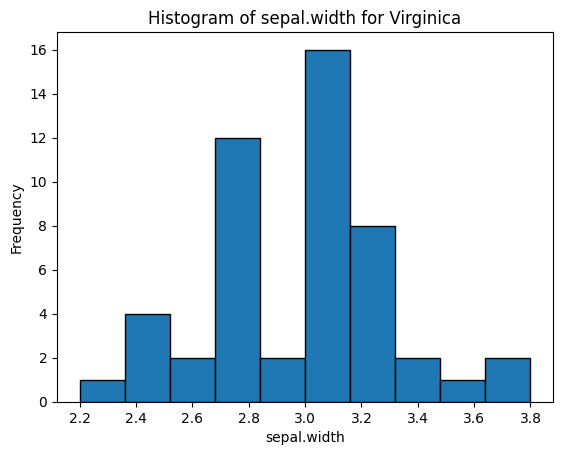

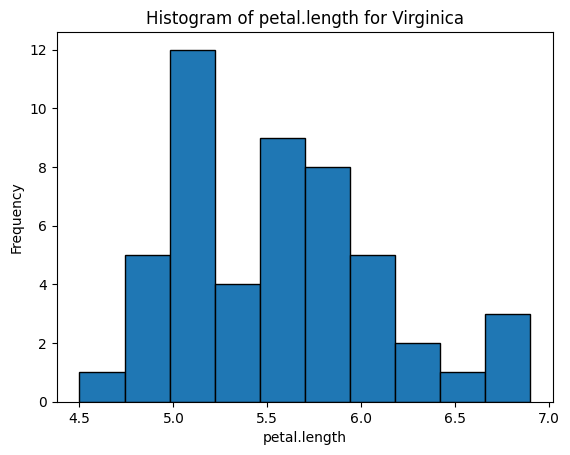

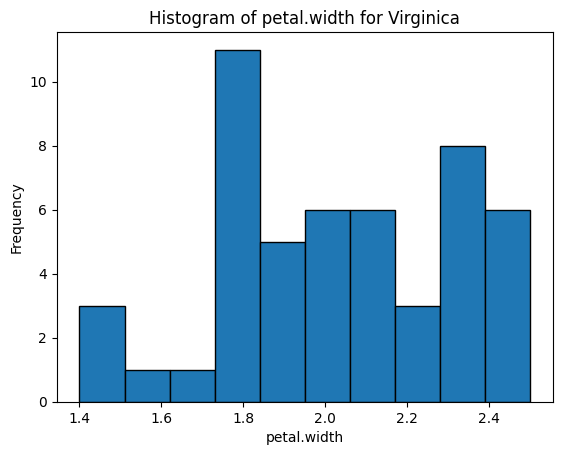

In [16]:
# Plot histograms for each numerical column
numeric_columns = virginica_df.select_dtypes(include=['float64', 'float32', 'int']).columns

for column in numeric_columns:
    plt.figure()
    plt.hist(virginica_df[column], bins=10, edgecolor='black')
    plt.title(f'Histogram of {column} for Virginica')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


## Exercise 7
Save the `iris` data frame to `iris2.xlsx`, with split based on variety. Each type should be in a separate sheet with the sheet name the same as variety.

# Creating Data Frame
The `pandas` `DataFrame` constructor function is described here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html 




## Exercise 8
Create a `Dataframe` from the following data:
```
data = {
       "sepal.length": [5.006, 5.936, 6.588],
       "sepal.width": [3.428, 2.77 , 2.974],
       "petal.length": [1.462, 4.26 , 5.552],
       "petal.width": [0.246, 1.326, 2.026],
       "variety": ["Setosa", "Versicolor", "Virginica"]
}
```

## Exercise 9
Create a `Dataframe` from the following data and set proper column names:

```
[[5.006, 3.428, 1.462, 0.246, 'Setosa'],
[5.936, 2.77, 4.26, 1.326, 'Versicolor'],
[6.588, 2.974, 5.552, 2.026, 'Virginica']]
```

# SQL like operiations
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html


## Exercise 10

Join `df1` and `df2` to produce the same result as `df3`. How would you modify `df4` so that you can join it with `df1` to produce `df3`?

In [ ]:
df1 = pd.DataFrame({'sepal.length': {'Setosa': 5.005999999999999,
  'Versicolor': 5.936,
  'Virginica': 6.587999999999998},
 'sepal.width': {'Setosa': 3.428000000000001,
  'Versicolor': 2.7700000000000005,
  'Virginica': 2.9739999999999998}})
df2 = pd.DataFrame({'petal.length': {'Setosa': 1.4620000000000002,
  'Versicolor': 4.26,
  'Virginica': 5.552},
 'petal.width': {'Setosa': 0.2459999999999999,
  'Versicolor': 1.3259999999999998,
  'Virginica': 2.026}})

df3 = pd.DataFrame({'sepal.length': {'Setosa': 5.005999999999999,
  'Versicolor': 5.936,
  'Virginica': 6.587999999999998},
 'sepal.width': {'Setosa': 3.428000000000001,
  'Versicolor': 2.7700000000000005,
  'Virginica': 2.9739999999999998},
 'petal.length': {'Setosa': 1.4620000000000002,
  'Versicolor': 4.26,
  'Virginica': 5.552},
 'petal.width': {'Setosa': 0.2459999999999999,
  'Versicolor': 1.3259999999999998,
  'Virginica': 2.026}})
df4 = pd.DataFrame({'petal.length': {0: 1.4620000000000002, 1: 4.26, 2: 5.552},
 'petal.width': {0: 0.2459999999999999, 1: 1.3259999999999998, 2: 2.026}})

## Exercise 11*
How is `df3` from the previous exercise produced from the `iris` `DataFrame`?

## Exercise 12
Join the `dd1` and `dd2` `DataFrame`s using `variety` column.  

In [ ]:
dd1 = pd.DataFrame({'sepal.length': {0: 5.005999999999999, 1: 5.936, 2: 6.587999999999998},
 'sepal.width': {0: 3.428000000000001,
  1: 2.7700000000000005,
  2: 2.9739999999999998},
 'variety': {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}})

dd2 = pd.DataFrame({'petal.length': {0: 1.4620000000000002, 1: 4.26, 2: 5.552},
 'petal.width': {0: 0.2459999999999999, 1: 1.3259999999999998, 2: 2.026},
 'variety': {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}})

# Time data aggregation

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html


## Exercise 13*
`data/book_extract.csv` file consists of records regarding financial performance of dealers. Prepare a report which explicates financial performance of dealers eligible for a payable bonus based on net result (`income-(clawback+opex)`) for each calendar month, given that opex/income ratio does not exceed 15%.

Report should have tabular form, rows indicating bonus basis for each month with at least one eligible dealer, columns indicating all dealers.